In [ ]:
!pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [2]:
!pip uninstall -y mediapipe
!pip install mediapipe==0.10.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled p

In [1]:
import mediapipe as mp
print("MediaPipe version:", mp.__version__)
print("Has solutions:", hasattr(mp, "solutions"))


MediaPipe version: 0.10.15
Has solutions: True


In [2]:
import cv2
import mediapipe as mp
import numpy as np

In [3]:
mp_pose = mp.solutions.pose
mp_draw = mp.solutions.drawing_utils

pose = mp_pose.Pose(
    static_image_mode=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)


/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


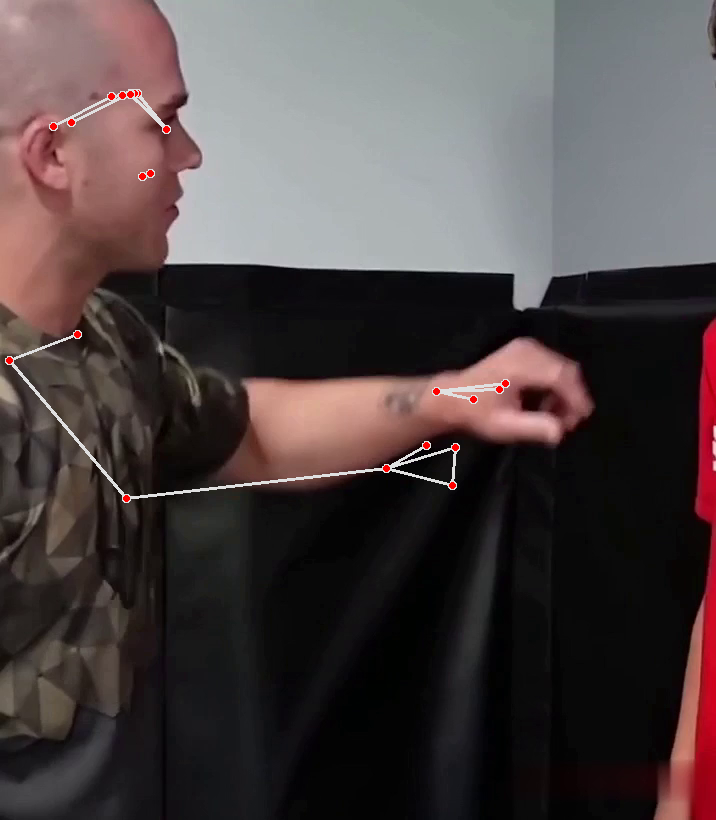

In [4]:
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture("/content/pose_detection_demo.mp4")
ret, frame = cap.read()
cap.release()

if not ret:
    print("Failed to read video frame")
else:
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_draw.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )
        cv2_imshow(frame)
    else:
        print("No pose detected")


In [5]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    right_wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST]
    right_elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]

    rw = np.array([right_wrist.x, right_wrist.y])
    re = np.array([right_elbow.x, right_elbow.y])
    rs = np.array([right_shoulder.x, right_shoulder.y])

    print("Right wrist:", rw)
    print("Right elbow:", re)
    print("Right shoulder:", rs)


Right wrist: [0.5395081  0.57171077]
Right elbow: [0.17720075 0.60794467]
Right shoulder: [0.0133438  0.43988585]


In [6]:
def calculate_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.degrees(np.arccos(cosine))
    return angle

arm_angle = calculate_angle(rs, re, rw)
print("Right arm angle:", arm_angle)


Right arm angle: 128.56361879279817


In [7]:
cap = cv2.VideoCapture("/content/pose_detection_demo.mp4")
prev_wrist = None
speeds = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        wrist = results.pose_landmarks.landmark[
            mp_pose.PoseLandmark.RIGHT_WRIST
        ]
        current = np.array([wrist.x, wrist.y])

        if prev_wrist is not None:
            speed = np.linalg.norm(current - prev_wrist)
            speeds.append(speed)

        prev_wrist = current

cap.release()

if speeds:
    print("Average hand speed:", np.mean(speeds))
else:
    print("No movement detected")


Average hand speed: 0.07943505211552868


Arm Angle: 23.73, Hand Speed: 0.0000, Behavior: Dangerous


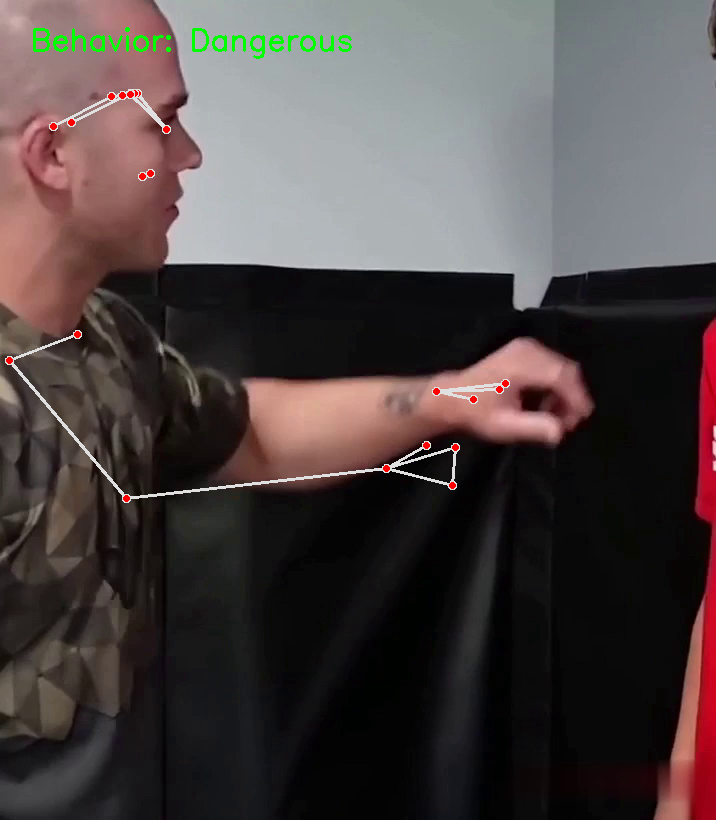

Arm Angle: 19.61, Hand Speed: 0.0443, Behavior: Dangerous


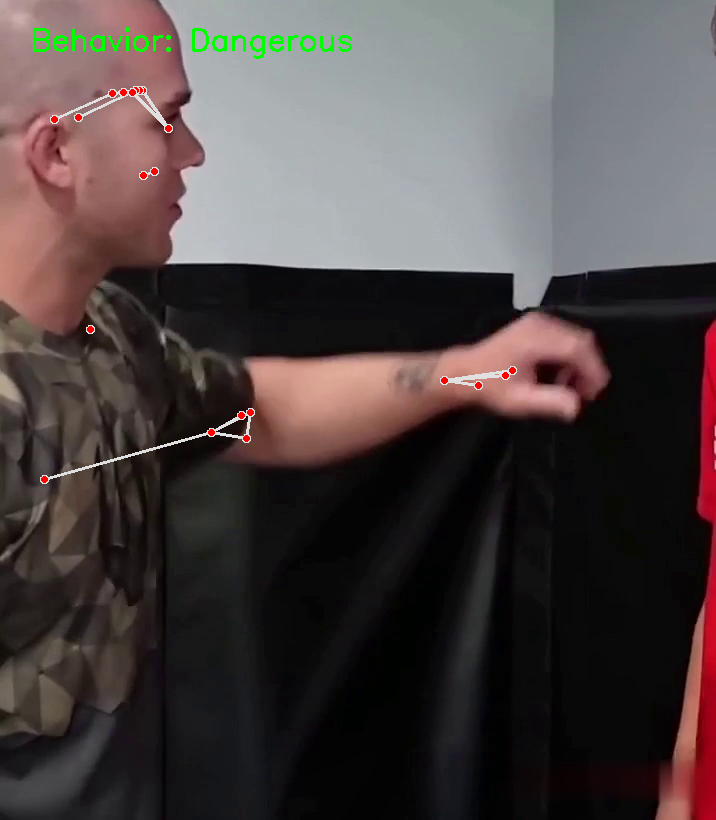

Arm Angle: 23.03, Hand Speed: 0.0019, Behavior: Dangerous


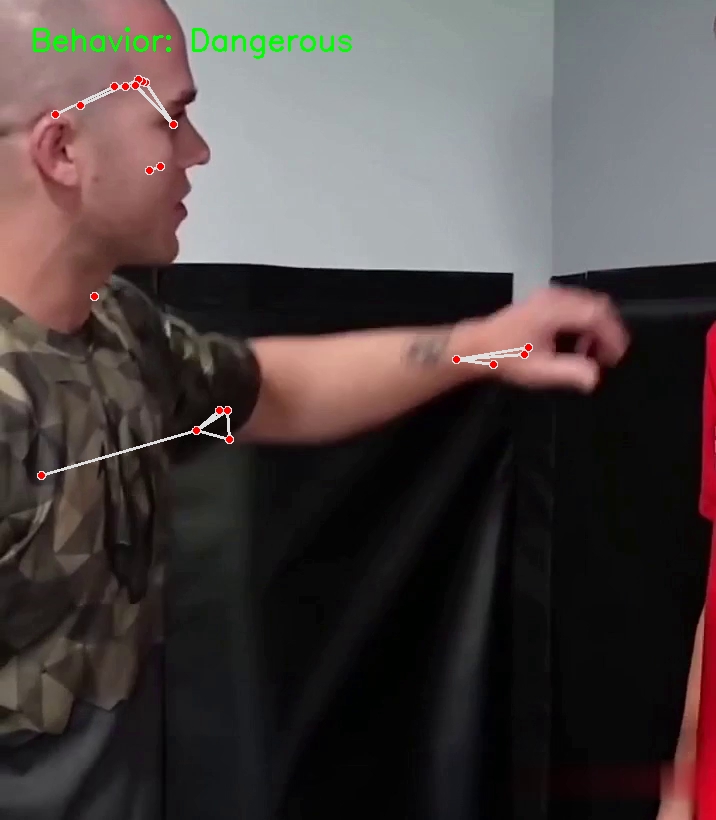

Arm Angle: 10.88, Hand Speed: 0.0698, Behavior: Dangerous


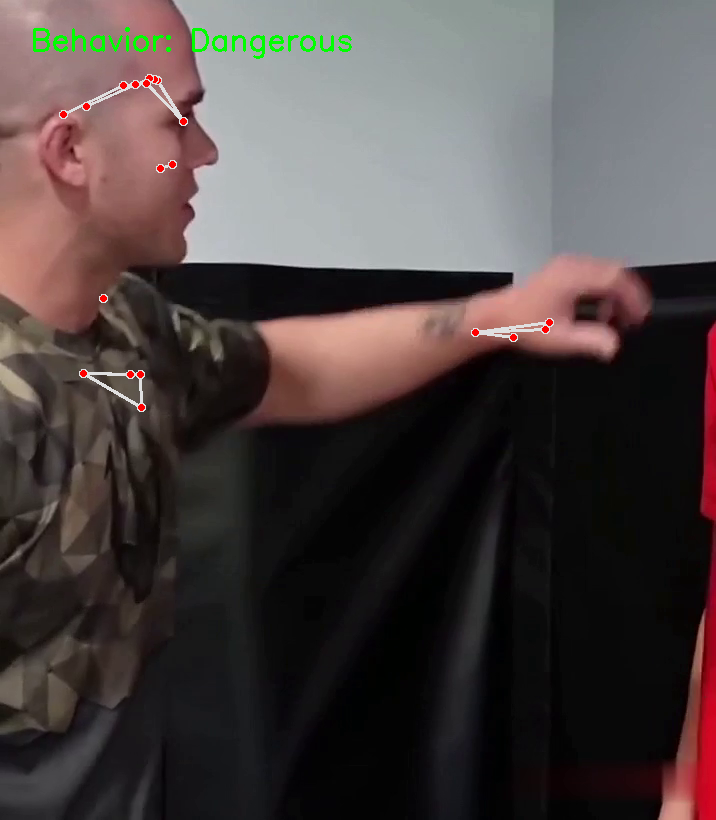

Arm Angle: 3.82, Hand Speed: 0.0439, Behavior: Dangerous


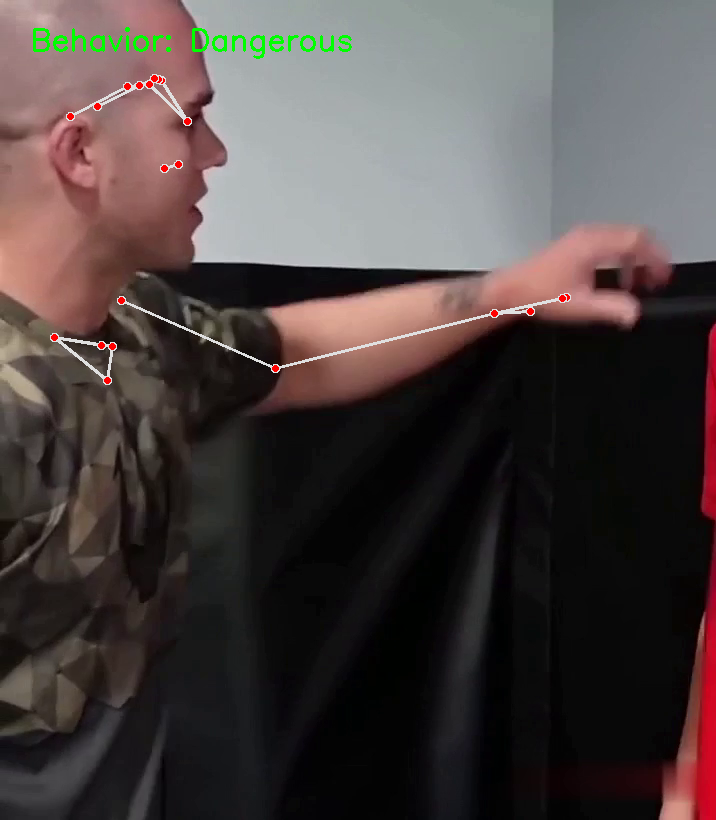

In [9]:
from google.colab.patches import cv2_imshow
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model

# Load ANN model
model = load_model("behavior_ann_model.h5")

behavior_labels = {
    0: "Normal",
    1: "Suspicious",
    2: "Dangerous"
}

# MediaPipe setup
mp_pose = mp.solutions.pose
mp_draw = mp.solutions.drawing_utils
pose = mp_pose.Pose()

cap = cv2.VideoCapture("/content/pose_detection_demo.mp4")

prev_wrist_y = None
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)

    if results.pose_landmarks:
        # Draw skeleton
        mp_draw.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

        lm = results.pose_landmarks.landmark

        shoulder = lm[mp_pose.PoseLandmark.RIGHT_SHOULDER]
        wrist = lm[mp_pose.PoseLandmark.RIGHT_WRIST]

        # Feature 1: Arm angle
        arm_angle = abs(wrist.y - shoulder.y) * 180

        # Feature 2: Hand speed
        if prev_wrist_y is None:
            hand_speed = 0
        else:
            hand_speed = abs(wrist.y - prev_wrist_y)

        prev_wrist_y = wrist.y

        # ANN prediction
        ann_input = np.array([[arm_angle, hand_speed]])
        prediction = model.predict(ann_input, verbose=0)
        predicted_class = np.argmax(prediction)
        behavior = behavior_labels[predicted_class]

        # Overlay behavior
        cv2.putText(
            frame,
            f"Behavior: {behavior}",
            (30, 50),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )

        print(f"Arm Angle: {arm_angle:.2f}, Hand Speed: {hand_speed:.4f}, Behavior: {behavior}")

    cv2_imshow(frame)

    frame_count += 1
    if frame_count == 5:
        break

cap.release()

In [10]:
import pandas as pd

data = {
    "arm_angle": [arm_angle],
    "hand_speed": [np.mean(speeds)]
}

df = pd.DataFrame(data)
df.to_csv("pose_features.csv", index=False)

print("Features saved for ANN training")


Features saved for ANN training
